# Практикум 2. Модель Кокса-Росса-Рубинштейна

In [1]:
%load_ext autoreload
%autoreload 2
from math import *
import numpy as np
import matplotlib.pyplot as plt
from finmath1 import *
plt.rcParams['figure.figsize'] = (5, 3)

## Вычисление цен платежных обязательств

Пример вычисления цен платежных обязательств, не зависящих от траектории цены базового актива (европейские опционы колл и пут).

In [2]:
model = CoxRossRubinstein(s0=100, u=0.1, d=-0.1, r=0.05)
print(model.call_price(2, 100))
print(model.call_price(2, [90, 100, 110]))
print(model.put_price(2, [90, 100, 110]))

10.714285714285726
[18.87755102 10.71428571  5.6122449 ]
[0.51020408 1.41723356 5.38548753]


Пример вычисления цены барьерного опциона колл вниз-и-выход со страйком $K=2$ и барьером $H=92$.

In [3]:
T = 2
K = 95
H = 92
barrier_payoff = lambda s: np.maximum(s[-1] - K, 0) * np.all(s>=H, axis=0)
print(model.path_dep_price(T, barrier_payoff))

13.945578231292528


Вычисление цен американских опционов и сравнение их с ценами европейских опционов.

In [4]:
print(model.american_call_price(2, 102))
print(model.call_price(2, 102))
print(model.american_put_price(2, 102))
print(model.put_price(2, 102))

9.693877551020416
9.69387755102042
3.367346938775506
2.2108843537414904


## Симуляция цены рискового актива

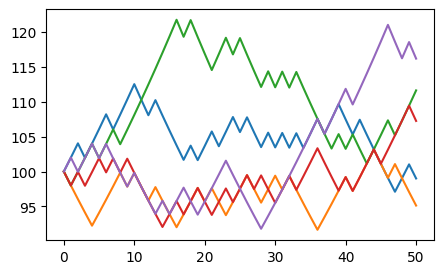

In [6]:
# 5 траекторий в 50-шаговой модели
model = CoxRossRubinstein(s0=100, u=0.02, d=-0.02)
plt.plot(model.simulate(50, 5))
plt.xticks(range(0, 51, 10)); # Сделать отметки по оси x через каждые 10 шагов

## Приближение модели Блэка-Шоулса

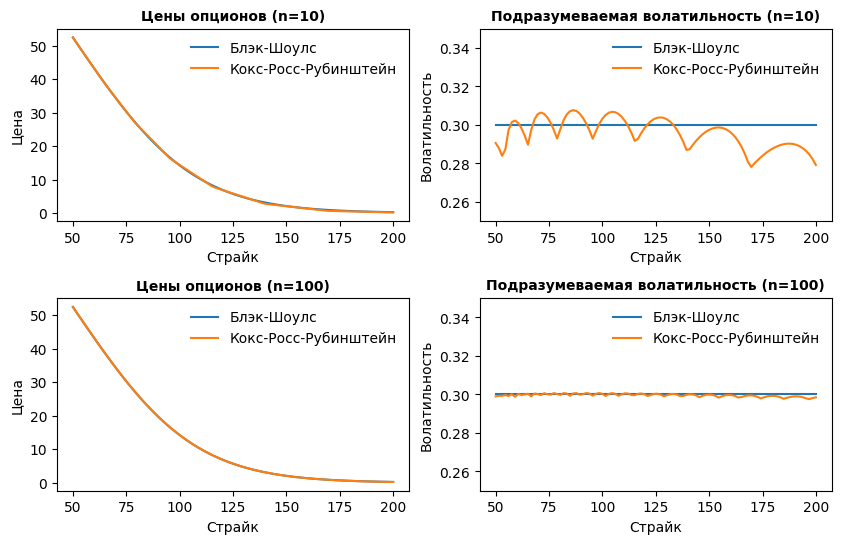

In [7]:
s0 = 100
sigma = 0.3
r = 0.05
T = 1

# Создадим 4 подграфика и отрегулируем горизонтальный промежуток между ними
fig, ax = plt.subplots(2, 2, figsize=(10,6), squeeze=False)
fig.subplots_adjust(hspace=0.4)

# Модель Блэка-Шоулса и цены опционов в ней
bs_model = BlackScholes(s0, sigma, r)
K = np.linspace(50, 200, 100) # диапазон страйков
bs_price = bs_model.call_price(T, K)

for i, n in enumerate([10, 100]):
    # Цены опционов и их волатильность в модели Кокса-Росса-Рубинштейна
    crr_model = CoxRossRubinstein(s0, sigma/sqrt(n), -sigma/sqrt(n), r/n)
    crr_price = crr_model.call_price(T*n, K)
    crr_iv = implied_vol(s0*exp(r*T), T, K, crr_price, discount_factor=exp(-r*T))

    # Слева будут графики цен
    ax[i,0].plot(K, bs_price, label="Блэк-Шоулс")
    ax[i,0].plot(K, crr_price, label="Кокс-Росс-Рубинштейн")
    ax[i,0].legend(loc="upper right", frameon=False)
    ax[i,0].set_title(f"Цены опционов (n={n})", fontsize=10, fontweight="bold")
    ax[i,0].set_xlabel("Страйк")
    ax[i,0].set_ylabel("Цена")

    # а справа - графики волатильности
    ax[i,1].plot(K, np.ones(len(K))*sigma, label="Блэк-Шоулс")
    ax[i,1].plot(K, crr_iv, label="Кокс-Росс-Рубинштейн")
    ax[i,1].set_ylim(0.25, 0.35)
    ax[i,1].legend(loc="upper right", frameon=False)
    ax[i,1].set_title(f"Подразумеваемая волатильность (n={n})", fontsize=10,
    fontweight="bold")
    ax[i,1].set_xlabel("Страйк")
    ax[i,1].set_ylabel("Волатильность")